In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

In [3]:
df = pd.read_csv("data_encoded.csv")
X = df.drop( columns = ['Credit_Score_encoded'])  # Exclude the target column
y = df['Credit_Score_encoded']

In [4]:
# Using a random forest classifier for the RFE model to work
# Initializing the model
model = RandomForestClassifier()

In [6]:
# Initialize RFE with the model and the desired number of features to keep
num_features_to_keep = 5  # we chose to keep 5 each round
rfe = RFE(estimator = model, n_features_to_select   =num_features_to_keep)

In [7]:
# Fit RFE on the data
rfe.fit(X, y)

# For loop for RFE to print the important features for each round
for i in range(num_features_to_keep, 0, -1):
    print(f"Round {i}: Selected features - {', '.join(X.columns[rfe.support_])}")
    if i > 1:
        eliminated_feature = X.columns[np.where(rfe.ranking_ == i)[0][0]]
        print(f"Eliminated feature: {eliminated_feature}")
    print()

Round 5: Selected features - Interest_Rate, Changed_Credit_Limit, Outstanding_Debt, Credit_History_Age, Monthly_Balance
Eliminated feature: Delay_from_due_date

Round 4: Selected features - Interest_Rate, Changed_Credit_Limit, Outstanding_Debt, Credit_History_Age, Monthly_Balance
Eliminated feature: Credit_Mix_encoded

Round 3: Selected features - Interest_Rate, Changed_Credit_Limit, Outstanding_Debt, Credit_History_Age, Monthly_Balance
Eliminated feature: Credit_Utilization_Ratio

Round 2: Selected features - Interest_Rate, Changed_Credit_Limit, Outstanding_Debt, Credit_History_Age, Monthly_Balance
Eliminated feature: Annual_Income

Round 1: Selected features - Interest_Rate, Changed_Credit_Limit, Outstanding_Debt, Credit_History_Age, Monthly_Balance



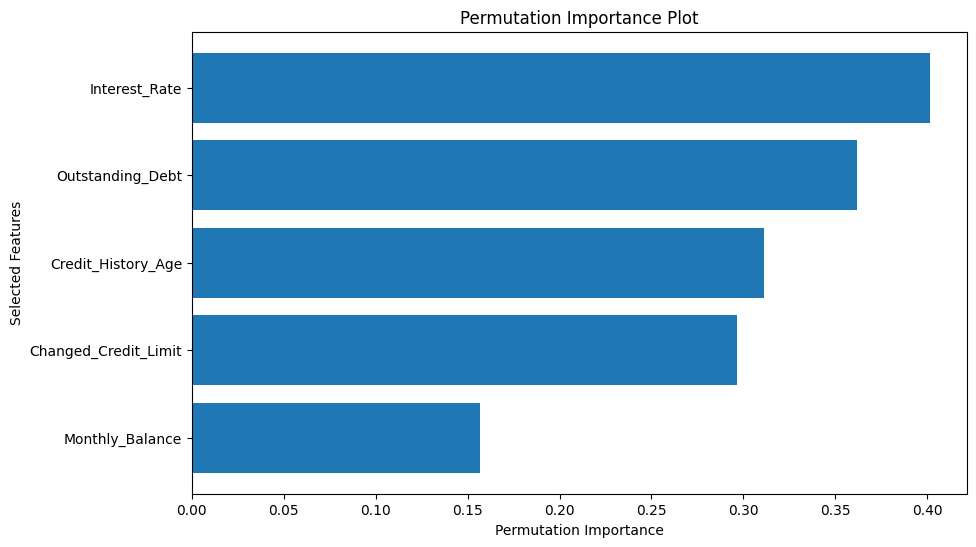

In [10]:
# Permutation importance
X_rfe = rfe.transform(X)  # Select the important features
perm_importance = permutation_importance(rfe.estimator_, X_rfe, y, n_repeats=30, random_state=0)
feature_importances = perm_importance.importances_mean

sorted_idx = np.argsort(feature_importances)

plt.figure(figsize=(10, 6))
plt.barh(range(num_features_to_keep), feature_importances[sorted_idx], align="center")
plt.yticks(range(num_features_to_keep), np.array(X.columns)[rfe.support_][sorted_idx])
plt.xlabel("Permutation Importance")
plt.ylabel("Selected Features")
plt.title("Permutation Importance Plot")
plt.show()

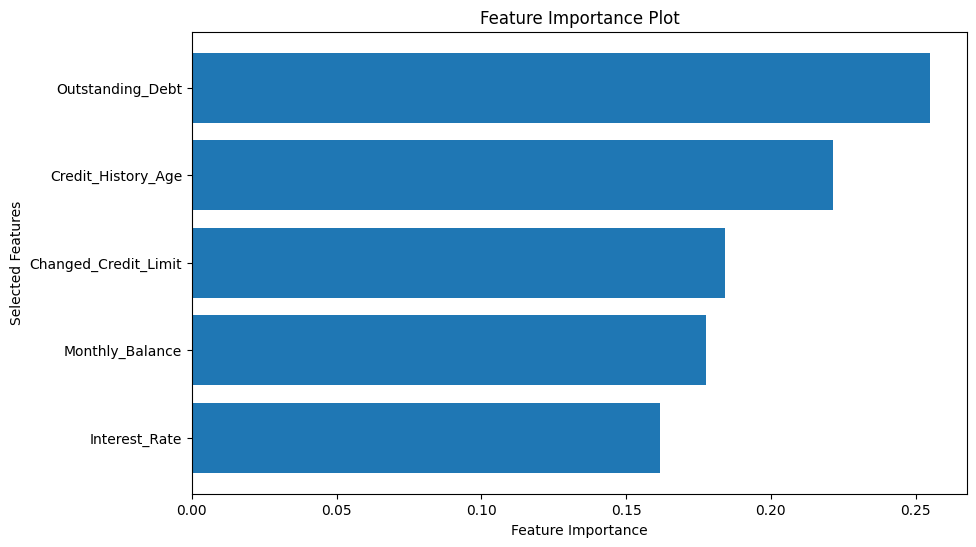

In [11]:
# Plotting feature importance
feature_importances = rfe.estimator_.feature_importances_
sorted_idx = np.argsort(feature_importances)

plt.figure(figsize=(10, 6))
plt.barh(range(num_features_to_keep), feature_importances[sorted_idx], align="center")
plt.yticks(range(num_features_to_keep), np.array(X.columns)[rfe.support_][sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Selected Features")
plt.title("Feature Importance Plot")
plt.show()

Intrepretation (taking Interest_Rate as an example):

- A permutation importance of 0.4 suggests that shuffling the "Interest_Rate" feature significantly impacts the model's performance, indicating its high importance in predicting the target.

- A feature importance of 0.17 within the context of a random forest indicates the contribution of the "Interest_Rate" feature to the model's overall decision-making process.

- The relatively high permutation importance indicates that this feature is influential when its values are changed, while the feature importance score reflects its impact on the random forest's predictive capability.

When building the Machine Learning models, we're going to expand the search, meaning we'll try training the model on the first 5 features, find the accuracy report, increase the num of features, find the accuracy report, and so on. However, this is a start.